# Identitas
Nama: Hidayat Widi Saputra

Nim: 2341720157

Kelas: TI-3G

Absen: 13


# Dataset - House Prices Dataset
[House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Dataset ini berisi atribut rumah (luas, tipe bangunan, kondisi, lokasi, dsb.)
yang dapat digunakan untuk eksplorasi fitur, penanganan missing values, dan clustering
rumah dengan karakteristik mirip.

Langkah tambahan:
- Fokus pada subset fitur numerik terlebih dahulu.
- Coba buat fitur baru seperti “TotalArea = GrLivArea + TotalBsmtSF”.




## Persiapan (Library)

In [570]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
try:
  from annoy import AnnoyIndex
except:
  !pip install -q annoy
  from annoy import AnnoyIndex

In [ ]:
try:
    from google.colab import drive
    from google.colab.output import clear as clear_output
    drive.mount('/content/drive')
    PATH_PREFIX = '/content/drive/MyDrive/Kuliah/K3S1[SEM5]/PEMB_MESIN/UTS/dataset/'
    clear_output()
except: 
    PATH_PREFIX = './dataset/'

df = pd.read_csv(PATH_PREFIX +'test.csv')

df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Preprocessing

In [572]:
df[df['Alley'].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
36,1497,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,Normal
37,1498,160,FV,30.0,3215,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,ConLD,Normal
38,1499,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
39,1500,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
42,1503,20,FV,57.0,12853,Pave,Pave,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,2791,20,RM,65.0,9750,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,4500,7,2006,WD,Normal
1335,2796,30,RL,50.0,11672,Pave,Pave,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1337,2798,50,RM,60.0,10320,Pave,Grvl,Reg,Lvl,AllPub,...,210,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml
1410,2871,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,COD,Abnorml


#### Tangani missing values

In [573]:
numeric_cols_with_nulls = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()]
print(df[numeric_cols_with_nulls].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1232 non-null   float64
 1   MasVnrArea    1444 non-null   float64
 2   BsmtFinSF1    1458 non-null   float64
 3   BsmtFinSF2    1458 non-null   float64
 4   BsmtUnfSF     1458 non-null   float64
 5   TotalBsmtSF   1458 non-null   float64
 6   BsmtFullBath  1457 non-null   float64
 7   BsmtHalfBath  1457 non-null   float64
 8   GarageYrBlt   1381 non-null   float64
 9   GarageCars    1458 non-null   float64
 10  GarageArea    1458 non-null   float64
dtypes: float64(11)
memory usage: 125.5 KB
None


In [574]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [575]:
# "No prescence" Berdasarkan deskripsi data
df["PoolQC"].fillna("NoPool", inplace=True)
df["MiscFeature"].fillna("NOMiscFeature", inplace=True)
df["Alley"].fillna("NOAlley", inplace=True)
df["Fence"].fillna("NOFence", inplace=True)
df["FireplaceQu"].fillna("NOFireplaceQu", inplace=True)
df["GarageCond"].fillna("NOGarageCond", inplace=True)
df["GarageQual"].fillna("NOGarageQual", inplace=True)
df["GarageYrBlt"].fillna("NOGarageYrBlt", inplace=True)
df["GarageFinish"].fillna("NOGarageFinish", inplace=True)
df["GarageType"].fillna("NOGarageType", inplace=True)
df["BsmtCond"].fillna("NOBsmtCond", inplace=True)
df["BsmtExposure"].fillna("NOBsmtExposure", inplace=True)
df["BsmtQual"].fillna("NOBsmtQual", inplace=True)
df["BsmtFinType2"].fillna("NOBsmtFinType2", inplace=True)
df["BsmtFinType1"].fillna("NOBsmtFinType1", inplace=True)

# Numerical variables (by neighborhood) in Kategoris
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF2"] = df.groupby("Neighborhood")["BsmtFinSF2"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF1"] = df.groupby("Neighborhood")["BsmtFinSF1"].transform(lambda x: x.fillna(x.median()))
df["MasVnrType"] = df.groupby("Neighborhood")["MasVnrType"].transform(lambda x: x.fillna(0))
df["MasVnrArea"] = df.groupby("Neighborhood")["MasVnrArea"].transform(lambda x: x.fillna(x.mean()))
df["MSZoning"] = df.groupby("Neighborhood")["MSZoning"].transform(lambda x: x.fillna(x.mode().values[0]))
df["Exterior2nd"] = df.groupby("Neighborhood")["Exterior2nd"].transform(lambda x: x.fillna(x.mode().values[0]))
df["BsmtUnfSF"] = df.groupby("Neighborhood")["BsmtUnfSF"].transform(lambda x: x.fillna(x.median()))
df["TotalBsmtSF"] = df.groupby("Neighborhood")["TotalBsmtSF"].transform(lambda x: x.fillna(x.median()))
df["Exterior1st"] = df.groupby("Neighborhood")["Exterior1st"].transform(lambda x: x.fillna(x.mode().values[0]))
df["SaleType"] = df.groupby("Neighborhood")["SaleType"].transform(lambda x: x.fillna(x.mode().values[0]))
df["Electrical"] = df.groupby("Neighborhood")["Electrical"].transform(lambda x: x.fillna(x.mode().values[0]))
df["KitchenQual"] = df.groupby("Neighborhood")["KitchenQual"].transform(lambda x: x.fillna(x.mode().values[0]))
df["GarageArea"] = df.groupby("Neighborhood")["GarageArea"].transform(lambda x: x.fillna(x.median()))
df["GarageCars"] = df.groupby("Neighborhood")["GarageCars"].transform(lambda x: x.fillna(x.mode().values[0]))

# Berdasarkan deskripsi data
df["Functional"] = df["Functional"].fillna("Typ")
df["BsmtHalfBath"].fillna(0, inplace=True)
df["BsmtFullBath"].fillna(0, inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('None')

for col in df.columns:
    if df[col].dtype in [np.float64, np.int64]:
        df[col] = df[col].fillna(0)


df = df.drop(['Id'], axis=1)
try:
  clear_output()
except:
  pass

In [576]:
# df = df.drop([
#     'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr',
#     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
#     axis=1,
# )

# df = df.drop([
#     'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
#     'Street', 'RoofMatl', 'ExterCond', 'BsmtCond', 'Heating', 'CentralAir',
#     'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive',
#     'MSZoning', 'SaleType', 'SaleCondition', 'LandContour', 'BsmtFinType2'
# ],axis=1)

In [577]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


###	Buat minimal satu fitur baru hasil kombinasi fitur lama
#### Coba buat fitur baru seperti “TotalArea = GrLivArea + TotalBsmtSF”.

In [578]:
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF']
display(df[['GrLivArea', 'TotalBsmtSF', 'TotalArea']].head())

,GrLivArea,TotalBsmtSF,TotalArea
0,896,882.0,1778.0
1,1329,1329.0,2658.0
2,1629,928.0,2557.0
3,1604,926.0,2530.0
4,1280,1280.0,2560.0


### Normalisasi atau standarisasi data

In [579]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
obj_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in obj_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))
numerical_cols = df.select_dtypes(include=np.number).columns

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea
0,-0.874711,-1.501668,0.526150,0.363929,0.06426,0.083814,0.742620,0.31870,-0.03705,0.572445,...,-0.057227,0.043675,-1.348162,-0.175956,-0.092244,-0.038281,1.713905,0.32475,0.201383,-0.958443
1,-0.874711,-0.042019,0.573788,0.897861,0.06426,0.083814,-1.384637,0.31870,-0.03705,-1.950811,...,-0.057227,0.043675,0.470579,-2.997051,19.730438,-0.038281,1.713905,0.32475,0.201383,0.160204
2,0.061351,-0.042019,0.240326,0.809646,0.06426,0.083814,-1.384637,0.31870,-0.03705,0.572445,...,-0.057227,0.043675,-1.348162,-0.175956,-0.092244,-1.140614,1.713905,0.32475,0.201383,0.031814
3,0.061351,-0.042019,0.430876,0.032064,0.06426,0.083814,-1.384637,0.31870,-0.03705,0.572445,...,-0.057227,0.043675,0.470579,-0.175956,-0.092244,-0.038281,1.713905,0.32475,0.201383,-0.002508
4,1.465443,-0.042019,-1.236435,-0.971808,0.06426,0.083814,-1.384637,-2.53396,-0.03705,0.572445,...,-0.057227,0.043675,0.470579,-0.175956,-0.092244,-1.875504,1.713905,0.32475,0.201383,0.035627


In [580]:
numerical_cols = df.select_dtypes(include=np.number).columns
data_for_clustering = df[numerical_cols]

## Clustering

### K-Means

In [581]:
def plot_kmeans_elbow(data, k_range):
    """
    Calculates and plots the Within-Cluster Sum of Squares (WCSS) for a range of K values
    for KMeans clustering to help determine the optimal number of clusters.

    Args:
        data (pd.DataFrame): The DataFrame to cluster.
        k_range (list or range): A list or range of integers representing the number of clusters to test.
    """
    wcss = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wcss, marker='o')
    plt.title('Elbow untuk Optimal K')
    plt.xlabel('Jumlah Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS) / Inertia')
    plt.grid(True)
    plt.show()

In [582]:
def perform_kmeans(data, n_clusters):
    """
    Performs KMeans clustering on the input data.

    Args:
        data (pd.DataFrame or np.ndarray): The data to cluster.
        n_clusters (int): The number of clusters to form.

    Returns:
        np.ndarray: The cluster labels assigned by KMeans.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Set n_init explicitly
    kmeans.fit(data)
    return kmeans.labels_

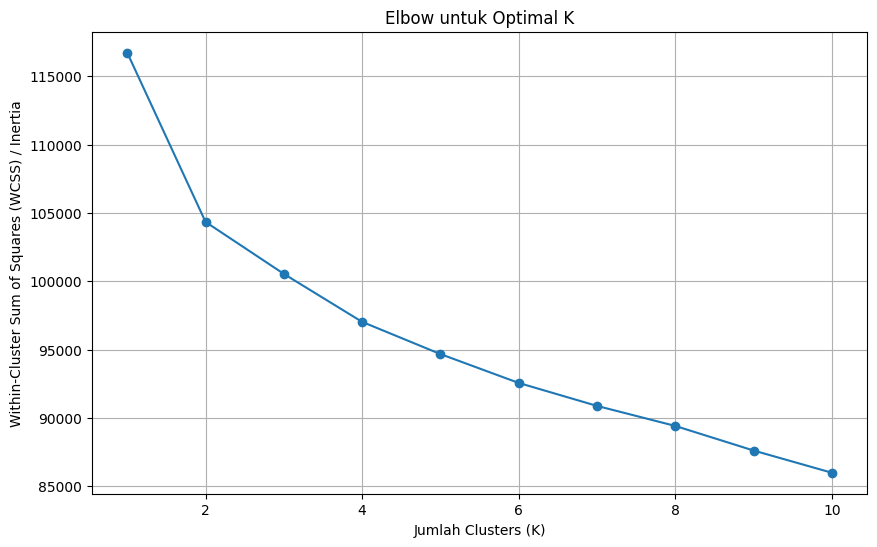

In [583]:
k_range = range(1, 11)

plot_kmeans_elbow(data_for_clustering, k_range)

In [584]:
k_value = 2

kmeans_labels = perform_kmeans(data_for_clustering, k_value)

df['kmeans_cluster_label'] = kmeans_labels

display(df.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalArea,kmeans_cluster_label
0,-0.874711,-1.501668,0.526150,0.363929,0.06426,0.083814,0.742620,0.31870,-0.03705,0.572445,...,0.043675,-1.348162,-0.175956,-0.092244,-0.038281,1.713905,0.32475,0.201383,-0.958443,0
1,-0.874711,-0.042019,0.573788,0.897861,0.06426,0.083814,-1.384637,0.31870,-0.03705,-1.950811,...,0.043675,0.470579,-2.997051,19.730438,-0.038281,1.713905,0.32475,0.201383,0.160204,0
2,0.061351,-0.042019,0.240326,0.809646,0.06426,0.083814,-1.384637,0.31870,-0.03705,0.572445,...,0.043675,-1.348162,-0.175956,-0.092244,-1.140614,1.713905,0.32475,0.201383,0.031814,1
3,0.061351,-0.042019,0.430876,0.032064,0.06426,0.083814,-1.384637,0.31870,-0.03705,0.572445,...,0.043675,0.470579,-0.175956,-0.092244,-0.038281,1.713905,0.32475,0.201383,-0.002508,1
4,1.465443,-0.042019,-1.236435,-0.971808,0.06426,0.083814,-1.384637,-2.53396,-0.03705,0.572445,...,0.043675,0.470579,-0.175956,-0.092244,-1.875504,1.713905,0.32475,0.201383,0.035627,1


### DBScan

In [585]:
def find_best_dbscan_params(data, eps_range, min_samples_range):
    """
    Mencari parameter eps dan min_samples terbaik untuk DBSCAN berdasarkan Silhouette Score.

    Args:
        data (pd.DataFrame or np.ndarray): Data yang akan di-cluster.
        eps_range (list or np.ndarray): Range nilai eps yang akan dicoba.
        min_samples_range (list or range): Range nilai min_samples yang akan dicoba.

    Returns:
        tuple: (best_eps, best_min_samples, best_score, results_df)
            - best_eps: Nilai eps terbaik
            - best_min_samples: Nilai min_samples terbaik
            - best_score: Silhouette score terbaik
            - results_df: DataFrame berisi semua hasil percobaan
    """
    results = []
    best_score = -1
    best_eps = None
    best_min_samples = None

    print("Mencari parameter DBSCAN terbaik...")
    print(f"Testing {len(eps_range)} eps values × {len(min_samples_range)} min_samples values = {len(eps_range) * len(min_samples_range)} combinations\n")

    for eps in eps_range:
        for min_samples in min_samples_range:
            # Perform DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)

            # Hitung jumlah cluster (tidak termasuk noise)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)

            # Hitung silhouette score jika ada lebih dari 1 cluster dan ada non-noise points
            if n_clusters > 1 and n_noise < len(labels):
                # Filter noise points
                mask = labels != -1
                if np.sum(mask) > 1:
                    score = silhouette_score(data[mask], labels[mask])
                else:
                    score = -1
            else:
                score = -1

            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'noise_ratio': n_noise / len(labels),
                'silhouette_score': score
            })

            # Update best parameters
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                print(f"✓ New best: eps={eps:.3f}, min_samples={min_samples}, "
                      f"clusters={n_clusters}, noise={n_noise}, score={score:.4f}")

    results_df = pd.DataFrame(results)

    print(f"\n{'='*60}")
    print(f"HASIL TERBAIK:")
    print(f"  eps: {best_eps}")
    print(f"  min_samples: {best_min_samples}")
    print(f"  Silhouette Score: {best_score:.4f}")
    print(f"{'='*60}\n")

    return best_eps, best_min_samples, best_score, results_df


In [586]:
def perform_dbscan(data, eps, min_samples):
    """
    Performs DBSCAN clustering on the input data.

    Args:
        data (pd.DataFrame or np.ndarray): The data to cluster.
        eps (float): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
        min_samples (int): The number of samples in a neighborhood for a point to be considered as a core point.

    Returns:
        np.ndarray: The cluster labels assigned by DBSCAN, with -1 indicating noise.
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(data)
    return dbscan.labels_

In [587]:
# Cari parameter terbaik untuk DBSCAN
eps_range = np.arange(0.1, 1.5, 0.1)
min_samples_range = range(1, 11)

best_eps, best_min_samples, best_score, results_df = find_best_dbscan_params(
    data_for_clustering,
    eps_range,
    min_samples_range
)


print("\nTop 10 kombinasi parameter terbaik:")
top_results = results_df.nlargest(10, 'silhouette_score')
display(top_results)

Mencari parameter DBSCAN terbaik...
Testing 14 eps values × 10 min_samples values = 140 combinations

✓ New best: eps=0.100, min_samples=1, clusters=1458, noise=0, score=0.0014
✓ New best: eps=1.100, min_samples=1, clusters=1457, noise=0, score=0.0026
✓ New best: eps=1.100, min_samples=2, clusters=2, noise=1455, score=0.9687

HASIL TERBAIK:
  eps: 1.1
  min_samples: 2
  Silhouette Score: 0.9687


Top 10 kombinasi parameter terbaik:


,eps,min_samples,n_clusters,n_noise,noise_ratio,silhouette_score
101,1.1,2,2,1455,0.997258,0.968651
111,1.2,2,2,1455,0.997258,0.968651
121,1.3,2,2,1455,0.997258,0.968651
131,1.4,2,3,1452,0.995202,0.916643
130,1.4,1,1455,0,0.000000,0.003739
100,1.1,1,1457,0,0.000000,0.002564
110,1.2,1,1457,0,0.000000,0.002564
120,1.3,1,1457,0,0.000000,0.002564
0,0.1,1,1458,0,0.000000,0.001363
10,0.2,1,1458,0,0.000000,0.001363


In [588]:
eps_value = best_eps
min_samples_value = best_min_samples

print(f"Menggunakan parameter terbaik: eps={eps_value}, min_samples={min_samples_value}")

dbscan_labels = perform_dbscan(data_for_clustering, eps=eps_value, min_samples=min_samples_value)

df['dbscan_cluster_label'] = dbscan_labels

# Tampilkan informasi cluster
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"\nHasil Clustering DBSCAN:")
print(f"  Jumlah Cluster: {n_clusters}")
print(f"  Jumlah Noise Points: {n_noise}")
print(f"  Noise Ratio: {n_noise / len(dbscan_labels) * 100:.2f}%")

Menggunakan parameter terbaik: eps=1.1, min_samples=2

Hasil Clustering DBSCAN:
  Jumlah Cluster: 2
  Jumlah Noise Points: 1455
  Noise Ratio: 99.73%


### Visualisasi Clustering (2D)
Bandingkan hasil clustering

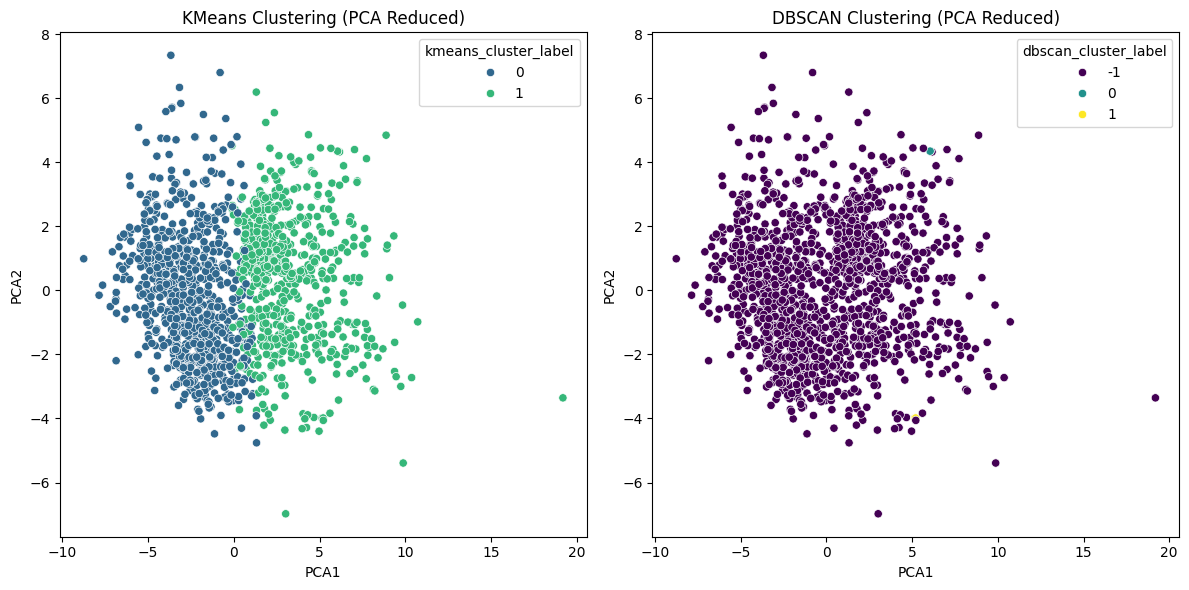

In [589]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=k_value)
data_pca = pca.fit_transform(data_for_clustering)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['kmeans_cluster_label'] = df['kmeans_cluster_label']
pca_df['dbscan_cluster_label'] = df['dbscan_cluster_label']

# Plot KMeans clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_cluster_label', data=pca_df, palette='viridis', legend='full')
plt.title('KMeans Clustering (PCA Reduced)')

# Plot DBSCAN clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='dbscan_cluster_label', data=pca_df, palette='viridis', legend='full')
plt.title('DBSCAN Clustering (PCA Reduced)')

plt.tight_layout()
plt.show()

In [590]:
# Silhouette Score
silhouette_kmeans = silhouette_score(data_for_clustering, df['kmeans_cluster_label'])
print(f'Silhouette Score (KMeans): {silhouette_kmeans}')

# Catatan: Skor Silhouette tidak cocok untuk DBSCAN dengan noise (label -1)
dbscan_core_samples_mask = (df['dbscan_cluster_label'] != -1)
if np.sum(dbscan_core_samples_mask) > 1 and len(np.unique(df['dbscan_cluster_label'][dbscan_core_samples_mask])) > 1:
    silhouette_dbscan = silhouette_score(data_for_clustering[dbscan_core_samples_mask], df['dbscan_cluster_label'][dbscan_core_samples_mask])
    print(f'Silhouette Score (DBSCAN - excluding noise): {silhouette_dbscan}')
else:
    print('Silhouette Score (DBSCAN): Tidak cukup titik non-noise atau kluster untuk dihitung.')


# Davies-Bouldin Index
davies_bouldin_kmeans = davies_bouldin_score(data_for_clustering, df['kmeans_cluster_label'])
print(f'Davies-Bouldin Index (KMeans): {davies_bouldin_kmeans}')

# Indeks Davies-Bouldin juga sensitif terhadap noise.
if np.sum(dbscan_core_samples_mask) > 1 and len(np.unique(df['dbscan_cluster_label'][dbscan_core_samples_mask])) > 1:
    davies_bouldin_dbscan = davies_bouldin_score(data_for_clustering[dbscan_core_samples_mask], df['dbscan_cluster_label'][dbscan_core_samples_mask])
    print(f'Davies-Bouldin Index (DBSCAN - excluding noise): {davies_bouldin_dbscan}')
else:
    print('Davies-Bouldin Index (DBSCAN): Tidak cukup titik non-noise atau kluster untuk dihitung.')

Silhouette Score (KMeans): 0.10661261253726646
Silhouette Score (DBSCAN - excluding noise): 0.9686512219326855
Davies-Bouldin Index (KMeans): 2.6735188411707593
Davies-Bouldin Index (DBSCAN - excluding noise): 0.031363912991806554


## Approximate Nearest Neighbor (ANN)

Approximate Nearest Neighbor (ANN) Results:
Query Point Index: 0
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (0, 0.0000, 0)
    - (303, 5.5041, 0)
    - (272, 5.6589, 0)
    - (937, 5.6663, 0)
    - (601, 6.0158, 0)
--------------------
Query Point Index: 1
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (1, 0.0000, 0)
    - (613, 15.2559, 0)
    - (1330, 16.1708, 0)
    - (734, 18.0032, 0)
    - (1237, 18.8759, 1)
--------------------
Query Point Index: 2
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (2, 0.0000, 1)
    - (473, 3.8057, 1)
    - (166, 4.0751, 1)
    - (119, 4.2062, 1)
    - (233, 4.2494, 1)
--------------------
Query Point Index: 3
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (3, 0.0000, 1)
    - (867, 4.5399, 1)
    - (227, 4.5471, 1)
    - (25, 4.5836, 1)
    - (1385, 4.6167, 1)
--------------------
Query Point Index: 4
  Nearest Neighbors (Index, Distance, KMeans Cluster):
    - (4, 0.0000, 1)
    - (479, 4

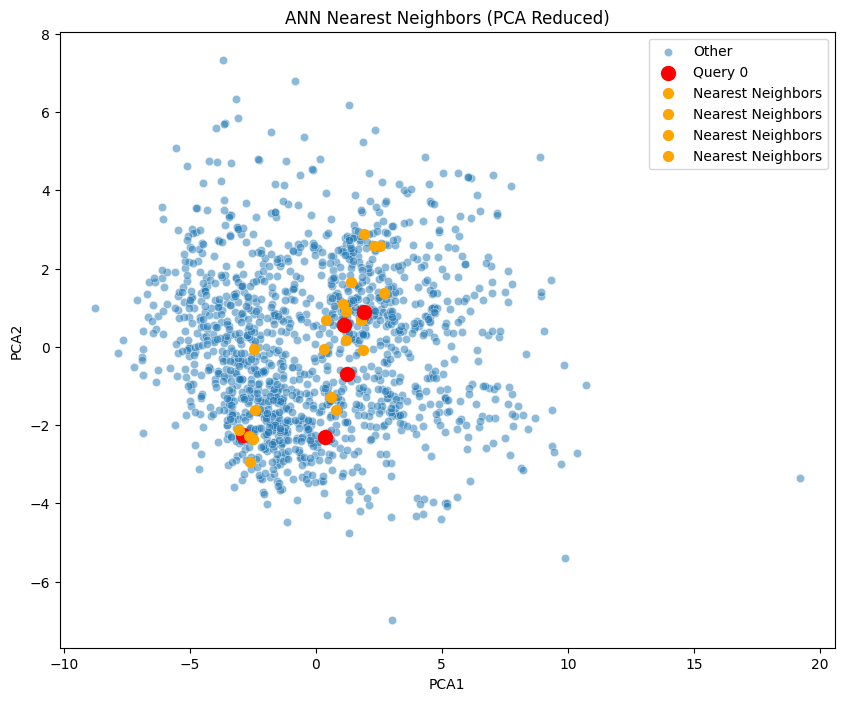

In [591]:
def find_nearest_neighbors_annoy(data, n_trees, query_indices, num_neighbors, kmeans_labels):
    """
    Builds an Annoy index and finds nearest neighbors for given query points.

    Args:
        data (pd.DataFrame or np.ndarray): The data to build the index from.
        n_trees (int): The number of trees for the Annoy index.
        query_indices (list): A list of indices of the data points to use as queries.
        num_neighbors (int): The number of nearest neighbors to find for each query point.
        kmeans_labels (np.ndarray): The KMeans cluster labels for the data.


    Returns:
        None: Prints the nearest neighbors and their distances.
    """
    # Define the number of dimensions for the Annoy index
    feature_matrix = data.to_numpy(dtype=np.float32)
    ann_dim = feature_matrix.shape[1]

    ann_index = AnnoyIndex(ann_dim, 'euclidean')
    for idx, vector in enumerate(feature_matrix):
      ann_index.add_item(idx, vector)
    ann_index.build(n_trees)

    print("Approximate Nearest Neighbor (ANN) Results:")
    print("="*50)

    # Prepare data for plotting
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(feature_matrix)
    pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
    pca_df['Type'] = 'Other'

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PCA1', y='PCA2', data=pca_df, alpha=0.5, label='Other')


    for example_item_index in query_indices:
        # Find nearest neighbors
        nearest_neighbors_indices, distances = ann_index.get_nns_by_item(
            example_item_index, num_neighbors, include_distances=True
        )

        print(f"Query Point Index: {example_item_index}")
        print("  Nearest Neighbors (Index, Distance, KMeans Cluster):")
        for neighbor_index, distance in zip(nearest_neighbors_indices, distances):
            print(f"    - ({neighbor_index}, {distance:.4f}, {kmeans_labels[neighbor_index]})")

        # Mark the query point and its neighbors in the plot
        plt.scatter(data_pca[example_item_index, 0], data_pca[example_item_index, 1], color='red', s=100, label=f'Query {example_item_index}' if example_item_index == query_indices[0] else "")
        for neighbor_index in nearest_neighbors_indices[1:]: # Exclude the query point itself
            plt.scatter(data_pca[neighbor_index, 0], data_pca[neighbor_index, 1], color='orange', s=50, label='Nearest Neighbors' if example_item_index == query_indices[0] else "")

        print("-" * 20)

    plt.title('ANN Nearest Neighbors (PCA Reduced)')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.show()


ann_data = data_for_clustering.copy()

n_trees = 100

# Select a few query points (first 5 data points)
query_indices = [0, 1, 2, 3, 4]
num_neighbors = 5 # Number of nearest neighbors to find

find_nearest_neighbors_annoy(ann_data, n_trees, query_indices, num_neighbors, kmeans_labels)

## Tulis kesimpulan singkat
a.	Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini dan jelaskan jawaban anda

- KMeans: KMeans membagi data menjadi 2 klaster, dengan ditentukan menggunakan elbow terbaik
- DBSCAN: DBSCAN membagi data menjadi 2 tetapi terdapat banyak noise (-1)
- Berdasarkan hasil metrik evaluasi (Silhouette Score dan Davies-Bouldin Index) dan visualisasi, DBSCAN terlihat memberikan hasil yang lebih baik dalam memisahkan klaster yang padat dari noise, meskipun sebagian besar data dianggap noise. Memiliki skor Silhouette yang tinggi dan DBI yang rendah menunjukkan pemisahan klaster yang lebih baik

b.	Nilai metrik terbaik (Silhouette, DBI).

-   **Silhouette Score:**
    -   KMeans: 0.1066
    -   DBSCAN: 0.9687 terbaik (mendekati 1)
-   **Davies-Bouldin Index:**
    -   KMeans: 2.6735
    -   DBSCAN: 0.0314 terbaik (mendekati 0)

    **DBSCAN tidak termasuk noise**

c.	Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang sama? Jelaskan jawaban anda.

- Query Point Index 0 (KMeans Cluster 0), semua 4 tetangga terdekatnya juga berada di KMeans Cluster 0.
- Query Point Index 1 (KMeans Cluster 0), 3 dari 4 tetangga terdekatnya berada di KMeans Cluster 0, ada 1 tetangga yang berada di KMeans Cluster 1. menandakan ada beberapa titik di perbatasan klaster atau tumpang tindih antar klaster.
- Query Point Index 2 (KMeans Cluster 1), semua 4 tetangga terdekatnya juga berada di KMeans Cluster 1.
- Query Point Index 3 (KMeans Cluster 1), semua 4 tetangga terdekatnya juga berada di KMeans Cluster 1.
- Query Point Index 4 (KMeans Cluster 1), semua 4 tetangga terdekatnya juga berada di KMeans Cluster 1.